In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('./clean_df.csv')

In [3]:
# Creating numeric and string sub data frames
df_numeric = df.select_dtypes(include=['int64','float64'])
df_object = df.select_dtypes(include=['object'])

In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Management Fee,1380.0,1.625562e-02,1.062257e-02,0.000000e+00,7.000000e-03,1.500000e-02,2.500000e-02,6.000000e-02
Minimum Investment,1380.0,3.881464e+05,2.909253e+06,0.000000e+00,1.000000e+03,1.000000e+04,5.000000e+04,5.000000e+07
Performance Fee,1380.0,6.542754e-02,9.384154e-02,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e-01,5.000000e-01
Liquidity Ratios,1380.0,7.740580e+00,2.659037e+01,0.000000e+00,0.000000e+00,3.000000e+00,5.000000e+00,5.040000e+02
age_months,1380.0,1.360710e+02,8.133004e+01,2.400000e+01,7.100000e+01,1.200000e+02,1.880000e+02,5.950000e+02
Tax Classification_Exempt,1380.0,5.797101e-03,7.594521e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Tax Classification_Long Term,1380.0,6.891304e-01,4.630173e-01,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
Tax Classification_Short Term,1380.0,3.768116e-02,1.904930e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Private Credit Anbima_Non-classified,1380.0,2.898551e-03,5.377960e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
Private Credit Anbima_Not applicable,1380.0,2.275362e-01,4.193936e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00


# Plots on Numeric Data Frames

In [5]:
def multi_box_plot(multi_plt_df):
    col_size = len(multi_plt_df.columns)
    fig, axs = plt.subplots(max(2,col_size//2), 2,figsize=(12,6))
    for pos,column in enumerate(multi_plt_df.columns):
        x = min(pos//2 + pos%2 ,pos//2)
        y = max(pos%2,pos%2)
        axs[x, y].boxplot(multi_plt_df[column].values, 0,'k', 0)
        axs[x, y].set_title(column,fontsize = 15)

    fig.subplots_adjust(left=0.08, right=0.98, bottom=0.05, top=0.9,
                        hspace=0.4, wspace=0.3)

In [6]:
fees_columns = ['Management Fee','Management Fee']
fund_caracteristics = ['Management Fee','Liquidity Ratios']
fund_performance = ['Return_6m', 'Return_12m','Return_24m',
                    'Volatility_6m', 'Volatility_12m', 'Volatility_24m']

In [7]:
df_numeric['Tax Classification_Long Term'].value_counts()

1    951
0    429
Name: Tax Classification_Long Term, dtype: int64

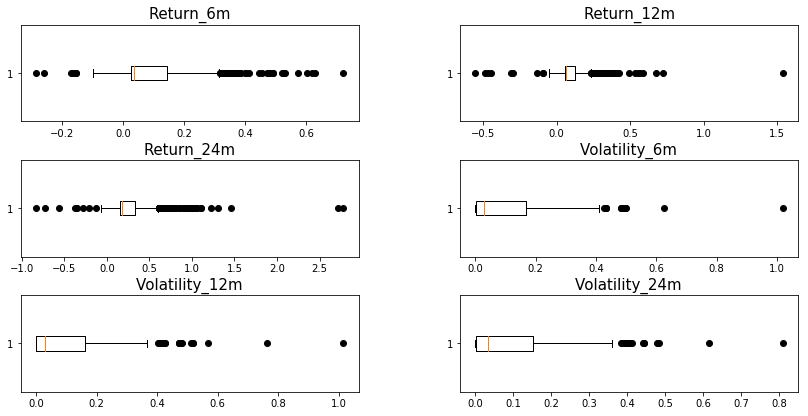

In [8]:
multi_box_plot(df_numeric[fund_performance])

## Analizing Most Significant Correlations

In [9]:
unstaked_series = df_numeric.corr().unstack()
unstaked_series = unstaked_series.sort_values(kind="quicksort")

pair_corr_df = pd.DataFrame(unstaked_series)
pair_corr_df.columns = ['correlation']
pair_corr_df.index.names = ['Feature1','Feature2']
# All correlations Lower than -0.5
pair_corr_df[pair_corr_df['correlation']<-0.5]

correlation
Feature1                                     Feature2                                                 
Legal Classification_FIC                     Legal Classification_FI                         -0.997004
Legal Classification_FI                      Legal Classification_FIC                        -0.997004
Performance Fee                              Performance Fee Reference Index_There is not    -0.983158
Performance Fee Reference Index_There is not Performance Fee                                 -0.983158
Private Credit Anbima_Not applicable         Tax Classification_Long Term                    -0.793130
Tax Classification_Long Term                 Private Credit Anbima_Not applicable            -0.793130
                                             Volatility_6m                                   -0.733035
Volatility_6m                                Tax Classification_Long Term                    -0.733035
Volatility_24m                               Tax Classification_Long Term                    -0.722721
Tax Classification_Long Term                 Volatility_24m                                  -0.722721
Volatility_12m                               Tax Classification_Long Term                    -0.716773
Tax Classification_Long Term                 Volatility_12m                                  -0.716773
Excess_Return_-_CDI_Opening_6m               Tax Classification_Long Term                    -0.667383
Tax Classification_Long Term                 Excess_Return_-_CDI_Opening_6m                  -0.667383
Excess_Return_-_Dollar_6m                    Tax Classification_Long Term                    -0.667383
Tax Classification_Long Term                 Excess_Return_-_Dollar_6m                       -0.667383
                                             Excess_Return_-_Ibovespa_6m                     -0.667383
Excess_Return_-_Ibovespa_6m                  Tax Classification_Long Term                    -0.667383
Return_6m                                    Tax Classification_Long Term                    -0.667383
Tax Classification_Long Term                 Return_6m                                       -0.667383
Excess_Return_-_Ibovespa_24m                 Tax Classification_Long Term                    -0.598177
Tax Classification_Long Term                 Excess_Return_-_Ibovespa_24m                    -0.598177
                                             Return_24m                                      -0.598177
Return_24m                                   Tax Classification_Long Term                    -0.598177
Excess_Return_-_CDI_Opening_24m              Tax Classification_Long Term                    -0.598177
Tax Classification_Long Term                 Excess_Return_-_CDI_Opening_24m                 -0.598177
Excess_Return_-_Dollar_24m                   Tax Classification_Long Term                    -0.598177
Tax Classification_Long Term                 Excess_Return_-_Dollar_24m                      -0.598177
CVM Category_Fixed Income                    Volatility_24m                                  -0.586782
Volatility_24m                               CVM Category_Fixed Income                       -0.586782
Benchmark_Ibovespa                           Tax Classification_Long Term                    -0.576643
Tax Classification_Long Term                 Benchmark_Ibovespa                              -0.576643
CVM Category_Fixed Income                    Volatility_6m                                   -0.576242
Volatility_6m                                CVM Category_Fixed Income                       -0.576242
CVM Category_Fixed Income                    Volatility_12m                                  -0.573673
Volatility_12m                               CVM Category_Fixed Income                       -0.573673
CVM Category_Multimarket                     CVM Category_Fixed Income                       -0.559840
CVM Category_Fixed Income                    CVM Category_Multimarket     

In [10]:
df_numeric['CVM Category_Fixed Income'].value_counts()

0    812
1    568
Name: CVM Category_Fixed Income, dtype: int64

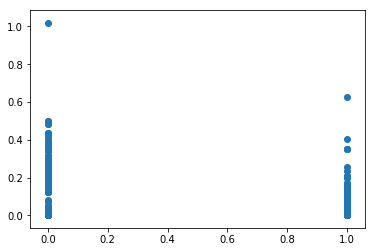

In [11]:
plt.scatter(df_numeric['Tax Classification_Long Term'], df_numeric['Volatility_6m'])

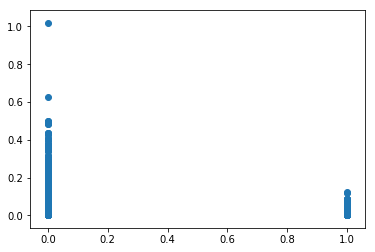

In [12]:
plt.scatter(df_numeric['CVM Category_Fixed Income'], df_numeric['Volatility_6m'])

In [13]:
# All correlations Grater than +0.5
pair_corr_df[(pair_corr_df['correlation']>0.8) 
             & (pair_corr_df['correlation']<0.9999)].sort_values(['correlation'],ascending=False)

correlation
Feature1                             Feature2                                         
Last_Assets                          Average_Assets_6m                        0.997680
Average_Assets_6m                    Last_Assets                              0.997680
                                     Average_Assets_12m                       0.993680
Average_Assets_12m                   Average_Assets_6m                        0.993680
Volatility_24m                       Volatility_12m                           0.989784
Volatility_12m                       Volatility_24m                           0.989784
Average_Assets_24m                   Average_Assets_12m                       0.989415
Average_Assets_12m                   Average_Assets_24m                       0.989415
                                     Last_Assets                              0.986618
Last_Assets                          Average_Assets_12m                       0.986618
Volatility_12m                       Volatility_6m                            0.982943
Volatility_6m                        Volatility_12m                           0.982943
                                     Volatility_24m                           0.973900
Volatility_24m                       Volatility_6m                            0.973900
Average_Assets_6m                    Average_Assets_24m                       0.968933
Average_Assets_24m                   Average_Assets_6m                        0.968933
Last_Assets                          Average_Assets_24m                       0.955443
Average_Assets_24m                   Last_Assets                              0.955443
Assets_Flow_12m                      Assets_Flow_24m                          0.924050
Assets_Flow_24m                      Assets_Flow_12m                          0.924050
Private Credit Anbima_Non-classified Leveraged Anbima_Non-classified          0.865711
Leveraged Anbima_Non-classified      Private Credit Anbima_Non-classified     0.865711
CVM Category_FX                      Benchmark_Dollar                         0.839159
Benchmark_Dollar                     CVM Category_FX                          0.839159

### Scaling data

In [14]:
ss = StandardScaler()
X = df_numeric
Y = df_object
X_sc = pd.DataFrame(ss.fit_transform(X))
X_sc.columns = df_numeric.columns

C:\Users\berku\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\berku\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [15]:
X_sc.head()

,Management Fee,Minimum Investment,Performance Fee,Liquidity Ratios,age_months,Tax Classification_Exempt,Tax Classification_Long Term,Tax Classification_Short Term,Private Credit Anbima_Non-classified,Private Credit Anbima_Not applicable,...,Excess_Return_-_CDI_Opening_12m,Excess_Return_-_CDI_Opening_24m,Excess_Return_-_Ibovespa_6m,Excess_Return_-_Ibovespa_12m,Excess_Return_-_Ibovespa_24m,Excess_Return_-_Dollar_6m,Excess_Return_-_Dollar_12m,Excess_Return_-_Dollar_24m,#_Funds_managed,Manager_avg_Assets
0,1.765220,-0.133122,-0.697466,0.574078,1.598131,-0.07636,0.671643,-0.19788,-0.053916,-0.542733,...,-0.259757,-0.298468,-0.306494,-0.259757,-0.298468,-0.306494,-0.259757,-0.298468,-0.879809,-0.641521
1,0.823487,-0.116273,1.434559,0.197866,-1.132477,-0.07636,0.671643,-0.19788,-0.053916,-0.542733,...,-0.018878,-0.166302,-0.444216,-0.018878,-0.166302,-0.444216,-0.018878,-0.166302,-0.850089,0.352737
2,0.823487,-0.116273,1.434559,-0.103104,-0.886476,-0.07636,0.671643,-0.19788,-0.053916,-0.542733,...,0.054135,-0.041591,-0.382632,0.054135,-0.041591,-0.382632,0.054135,-0.041591,-0.850089,0.352737
3,0.823487,-0.064695,1.434559,0.498836,-0.886476,-0.07636,0.671643,-0.19788,-0.053916,-0.542733,...,0.647564,0.589598,-0.158598,0.647564,0.589598,-0.158598,0.647564,0.589598,-0.850089,0.352737
4,0.635140,-0.133122,1.434559,0.611699,-1.353878,-0.07636,-1.488887,-0.19788,-0.053916,1.842527,...,-0.596050,0.866561,1.557554,-0.596050,0.866561,1.557554,-0.596050,0.866561,-0.879809,-0.706281


In [16]:
X_sc.to_csv('./X_scaled.csv',index=False)
Y.to_csv('./fund_info.csv',index=False)

In [20]:
X_sc['Tax Classification_Short Term'].value_counts()

-0.197880    1328
 5.053559      52
Name: Tax Classification_Short Term, dtype: int64

In [25]:
df['Tax Classification_Short Term'].value_counts()

0    1328
1      52
Name: Tax Classification_Short Term, dtype: int64

In [26]:
X_sc.columns

Index(['Management Fee', 'Minimum Investment', 'Performance Fee',
       'Liquidity Ratios', 'age_months', 'Tax Classification_Exempt',
       'Tax Classification_Long Term', 'Tax Classification_Short Term',
       'Private Credit Anbima_Non-classified',
       'Private Credit Anbima_Not applicable', 'Private Credit Anbima_Yes',
       'Leveraged Anbima_Non-classified', 'Leveraged Anbima_Yes',
       'Legal Classification_FI', 'Legal Classification_FIC',
       'Entidade de Previdência 3922_US_Yes',
       'Entidade de Previdência 4444_US_Yes',
       'Entidade de Previdência 4661_US_Yes', 'CVM Category_FX',
       'CVM Category_Fixed Income', 'CVM Category_Index Market',
       'CVM Category_Multimarket',
       'Performance Fee Reference Index_100% do IBX',
       'Performance Fee Reference Index_100% do Ibovespa',
       'Performance Fee Reference Index_Other_performance_fee',
       'Performance Fee Reference Index_There is not', 'Benchmark_Dollar',
       'Benchmark_IBX', 'Benchma